<a href="https://colab.research.google.com/github/priyanka-ingale/unstructured-intelligence/blob/main/IR_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Analysis - Part 1: Image Representation


In [1]:
from PIL import Image
import numpy as np
from numpy import array, histogram, interp
import matplotlib.pyplot as plt
import pandas as pd
import os

## Step 1: Read and Resize All 10 Images to 100×100 Pixels



In [2]:
image_dir = 'image/'
image_files = [f for f in os.listdir(image_dir) if f.endswith('.PNG')]
image_files.sort(key=lambda x: int(x.split('.')[0]))  # Sort by number: 1.PNG, 2.PNG, ..., 10.PNG

images_original = []  # Store original resized images
images_resized = []   # Store as arrays
for img_file in image_files:
    # Read image
    img_path = os.path.join(image_dir, img_file)
    im = Image.open(img_path)
    # Resize to 100x100 (as taught in class)
    im_resized = im.resize((100, 100))
    # Store both PIL image and array
    images_original.append(im_resized)
    images_resized.append(array(im_resized))

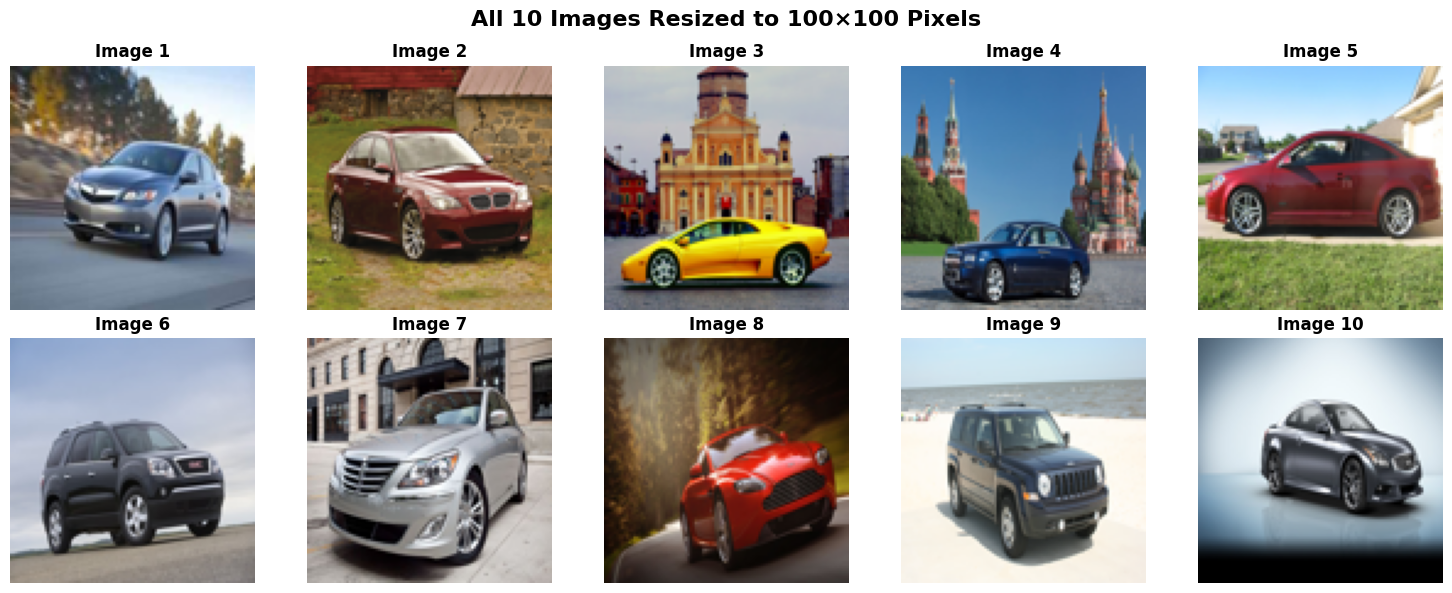

In [3]:
# Visualize all 10 resized images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('All 10 Images Resized to 100×100 Pixels', fontsize=16, fontweight='bold')
for idx, (img, ax) in enumerate(zip(images_original, axes.flatten())):
    ax.imshow(img)
    ax.set_title(f'Image {idx+1}', fontweight='bold')
    ax.axis('off')
plt.tight_layout()
plt.show()

## Step 2: Convert Each Image to Grayscale 2D Arrays


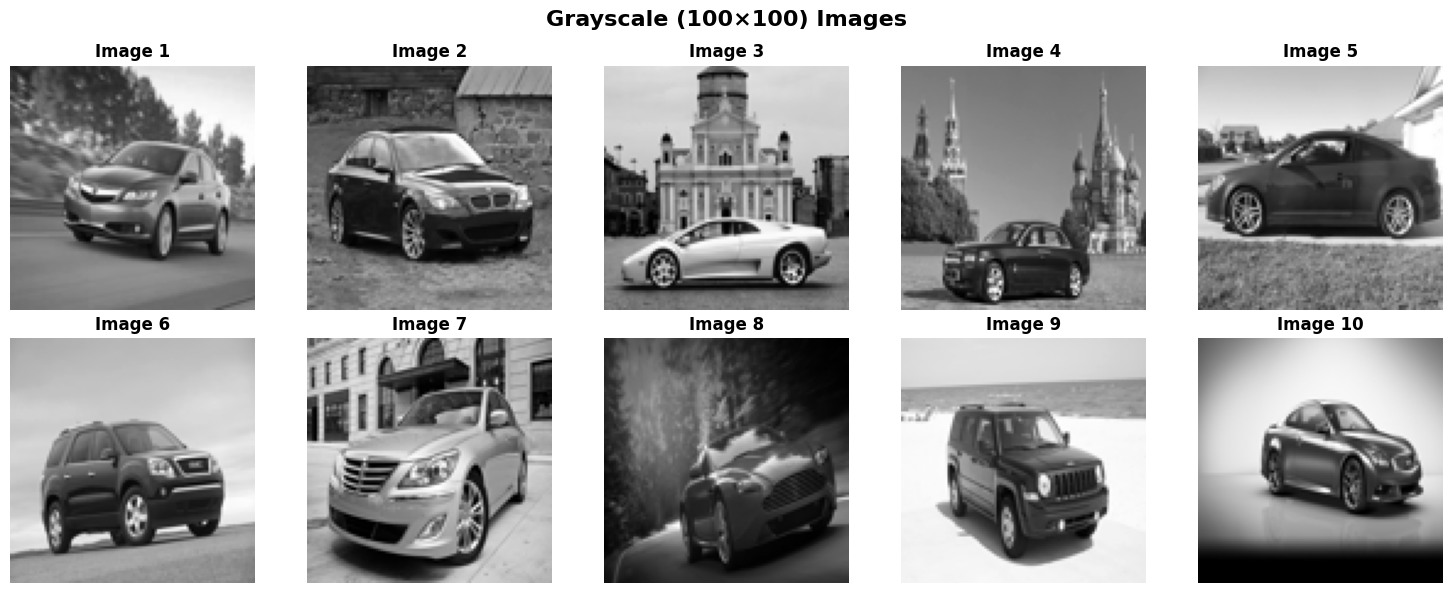

In [4]:
# Convert all images to grayscale 2D arrays
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Grayscale (100×100) Images', fontsize=16, fontweight='bold')

# Flatten axes for easy iteration in a single loop
axes_flat = axes.flatten()

images_gray = []
for idx, im in enumerate(images_original):
    # 1. Convert to grayscale ('L' mode)
    im_gray = im.convert('L')

    # Convert to numpy array
    im_gray_array = array(im_gray)
    images_gray.append(im_gray_array)

    # Visualize directly on the corresponding axis
    ax = axes_flat[idx]
    ax.imshow(im_gray_array, cmap=plt.cm.gray)
    ax.set_title(f'Image {idx+1}', fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()

## Step 3: Flatten 2D Arrays to 1D Vectors and Create Histograms


In [5]:
# Flatten all grayscale images to 1D vectors
images_flattened = []
for idx, img_gray in enumerate(images_gray):
    # Flatten to 1D (as taught in class)
    img_vector = img_gray.flatten()
    images_flattened.append(img_vector)
    print(f"Total pixels = {len(img_vector)}")
print(f"Each vector has {len(images_flattened[0])} values (100×100 = 10,000)")

Total pixels = 10000
Total pixels = 10000
Total pixels = 10000
Total pixels = 10000
Total pixels = 10000
Total pixels = 10000
Total pixels = 10000
Total pixels = 10000
Total pixels = 10000
Total pixels = 10000
Each vector has 10000 values (100×100 = 10,000)


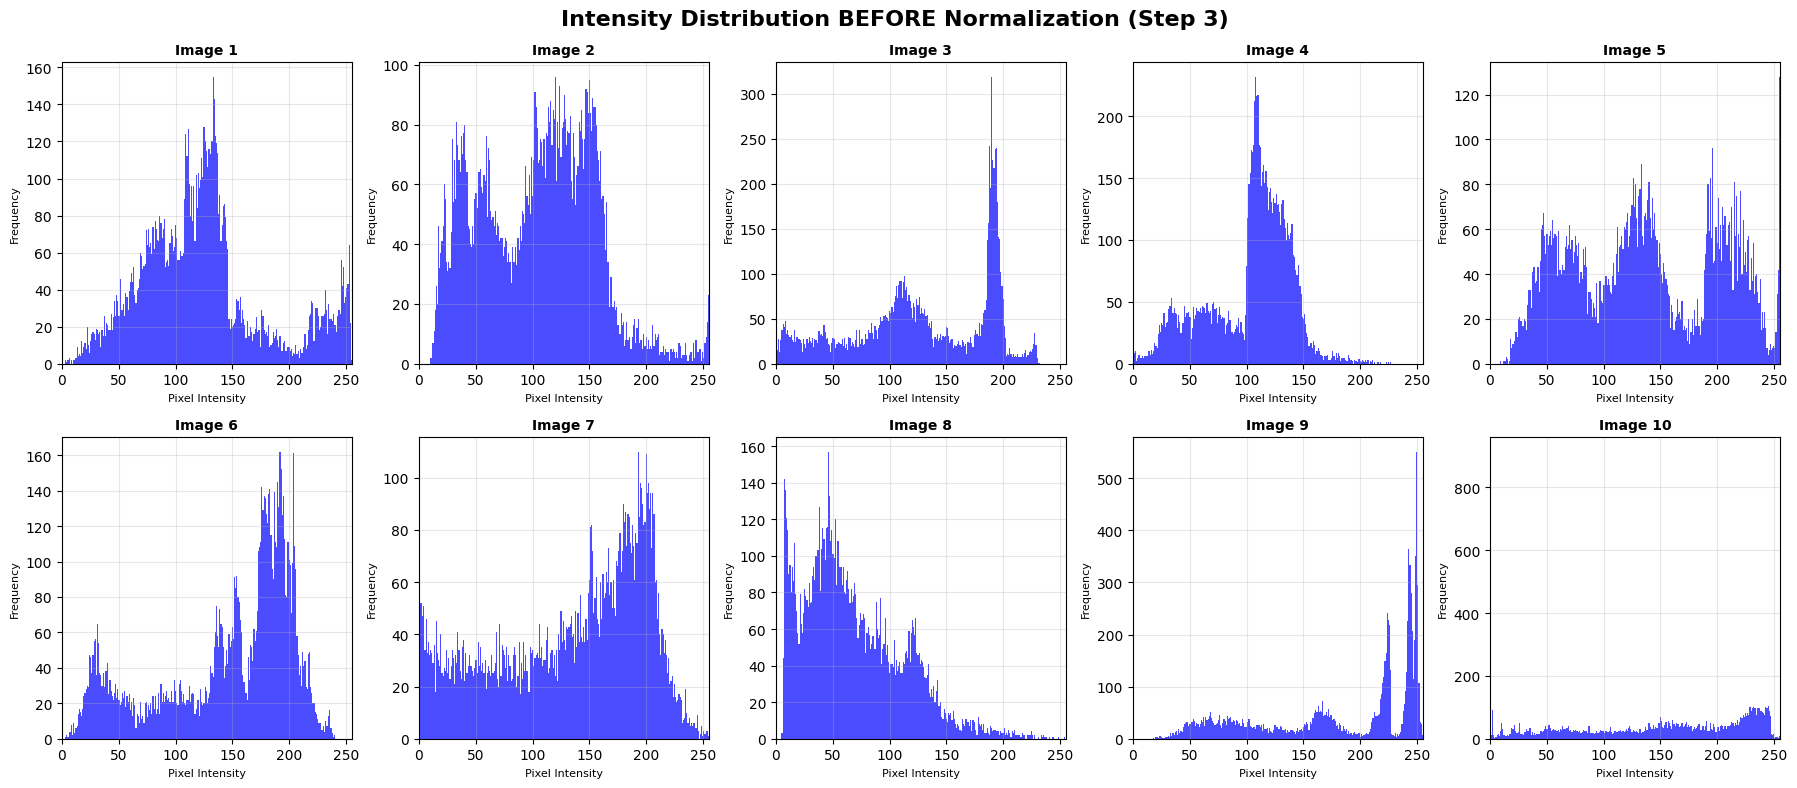

In [6]:
# Histograms for intensity distribution (BEFORE normalization)
fig, axes = plt.subplots(2, 5, figsize=(18, 8))
fig.suptitle('Intensity Distribution BEFORE Normalization (Step 3)',
             fontsize=16, fontweight='bold')

for idx, (img_vector, ax) in enumerate(zip(images_flattened, axes.flatten())):
    # Create histogram with 256 bins (0-255 intensity range)
    ax.hist(img_vector, bins=256, range=(0, 255), color='blue', alpha=0.7)
    ax.set_title(f'Image {idx+1}', fontweight='bold', fontsize=10)
    ax.set_xlabel('Pixel Intensity', fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)
    ax.set_xlim([0, 255])
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 4: Histogram Equalization for Normalization


In [7]:
# Apply histogram equalization to all images
images_normalized = []      # Normalized 2D arrays
images_normalized_flat = [] # Normalized 1D vectors

for idx, img_gray in enumerate(images_gray):
    # HISTOGRAM EQUALIZATION
    # Step 1: Calculate histogram
    imhist, bins = histogram(img_gray.flatten(), 256, density=True)
    # Step 2: Calculate cumulative distribution function (CDF)
    cdf = imhist.cumsum()
    # Step 3: Normalize CDF to 0-255 range
    cdf = 255 * cdf / cdf[-1]
    # Step 4: Map old values to new values
    img_normalized_flat = interp(img_gray.flatten(), bins[:-1], cdf)
    # Step 5: Reshape back to 2D
    img_normalized = img_normalized_flat.reshape(img_gray.shape)
    images_normalized.append(img_normalized)
    images_normalized_flat.append(img_normalized_flat)

print(f"\nSuccessfully normalized {len(images_normalized)} images using histogram equalization!")


Successfully normalized 10 images using histogram equalization!


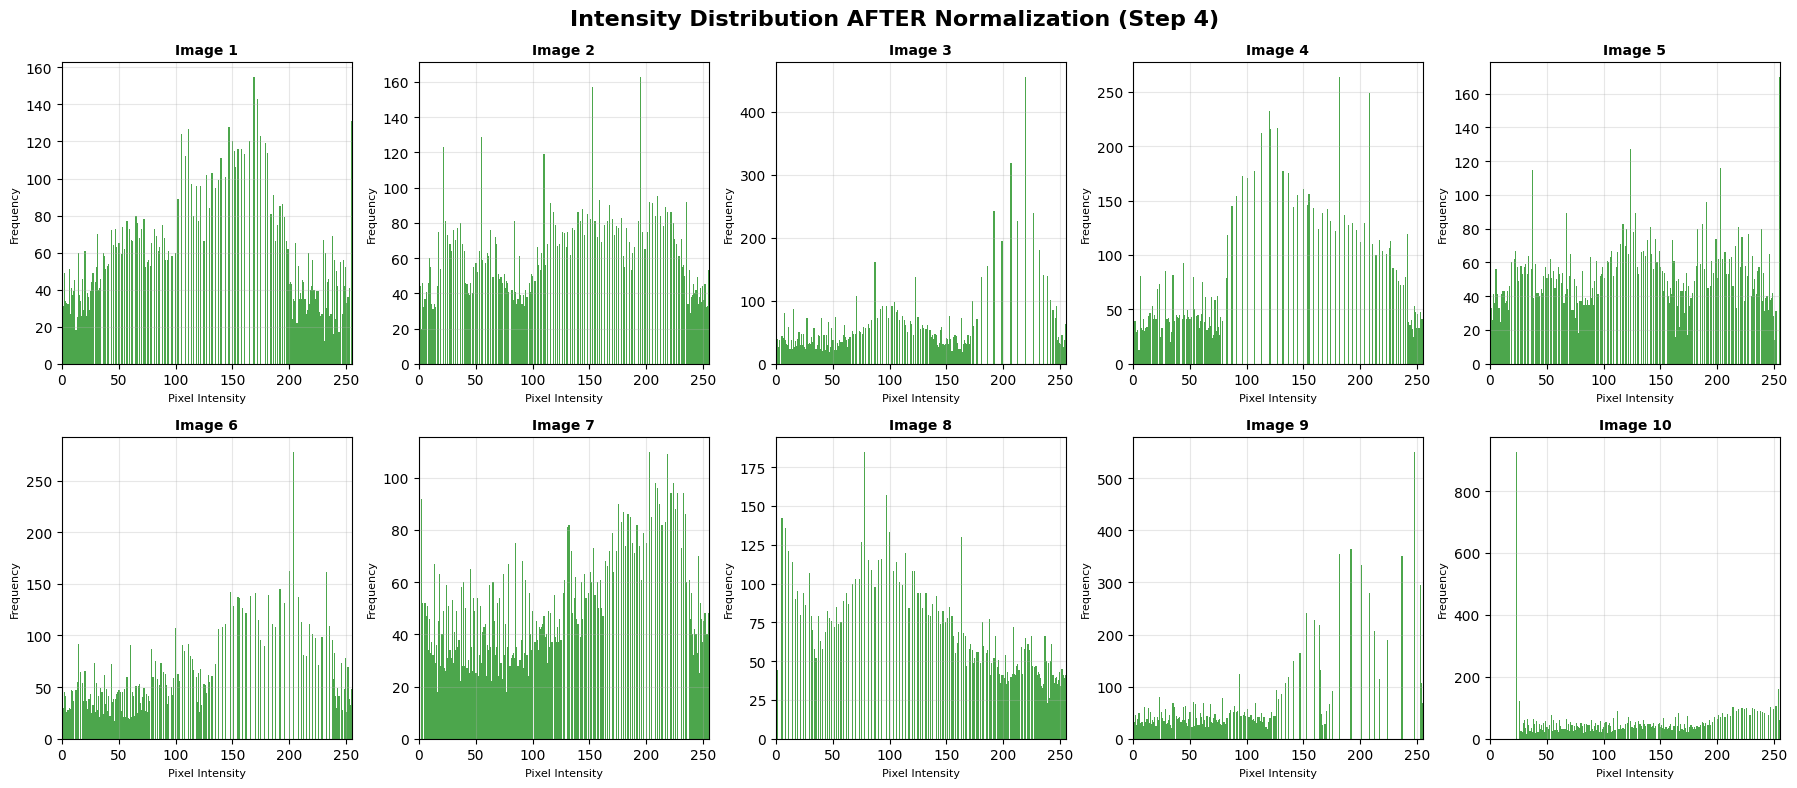

In [8]:
# Draw histograms for intensity distribution (AFTER normalization)
fig, axes = plt.subplots(2, 5, figsize=(18, 8))
fig.suptitle('Intensity Distribution AFTER Normalization (Step 4)',
             fontsize=16, fontweight='bold')

for idx, (img_vector, ax) in enumerate(zip(images_normalized_flat, axes.flatten())):
    # Create histogram with 256 bins
    ax.hist(img_vector, bins=256, range=(0, 255), color='green', alpha=0.7)
    ax.set_title(f'Image {idx+1}', fontweight='bold', fontsize=10)
    ax.set_xlabel('Pixel Intensity', fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)
    ax.set_xlim([0, 255])
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Visual Comparison: Before vs After Normalization

Let's visualize the images and their histograms side by side for better comparison.

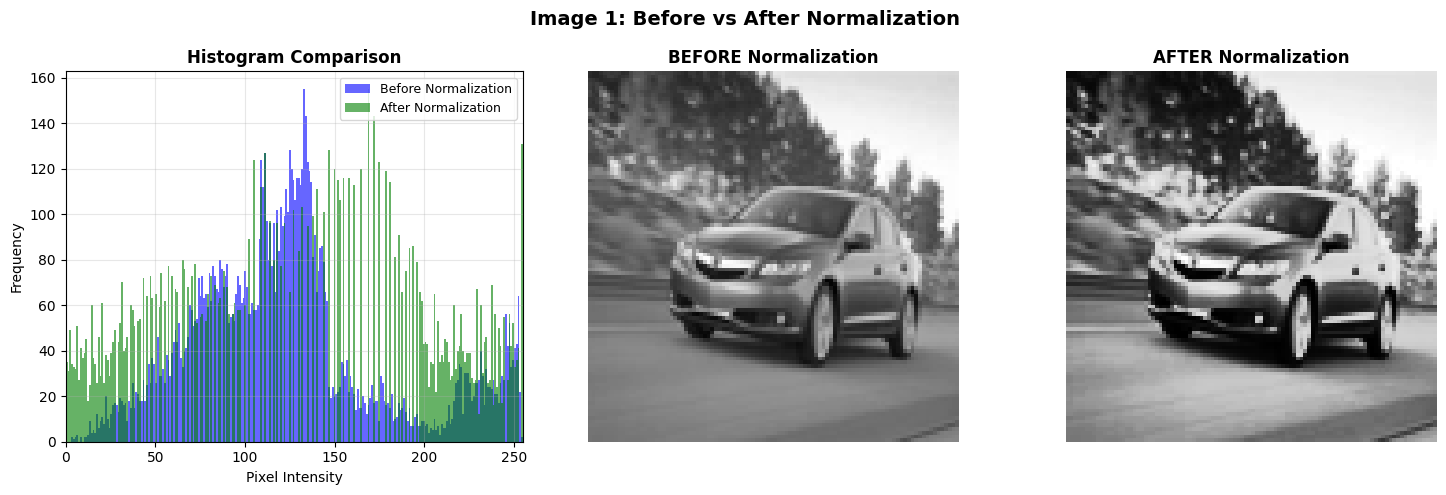

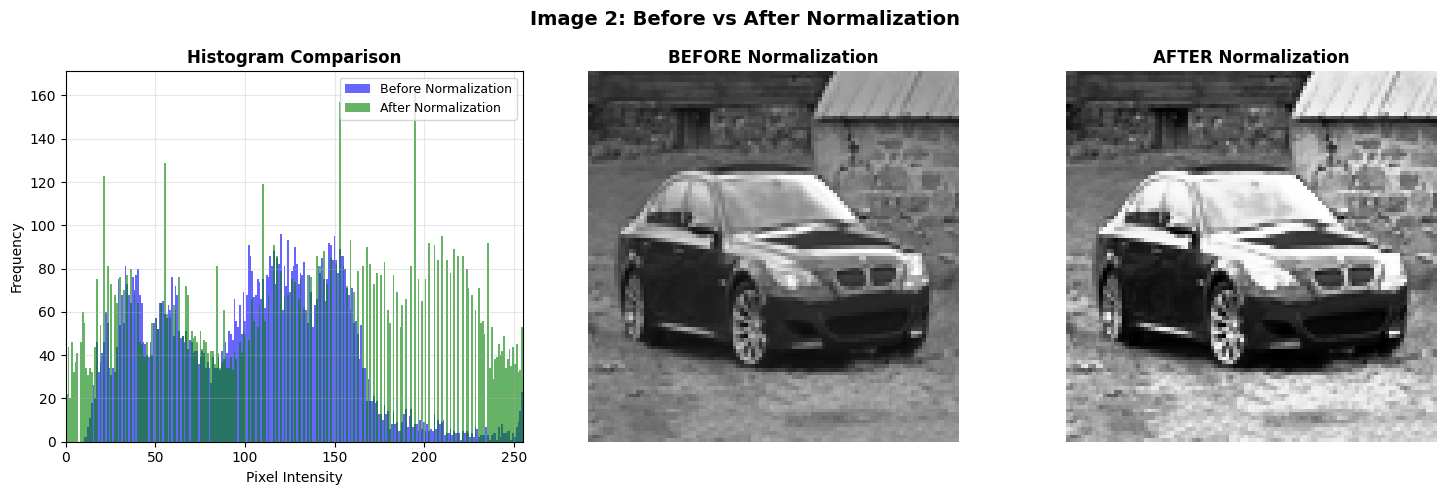

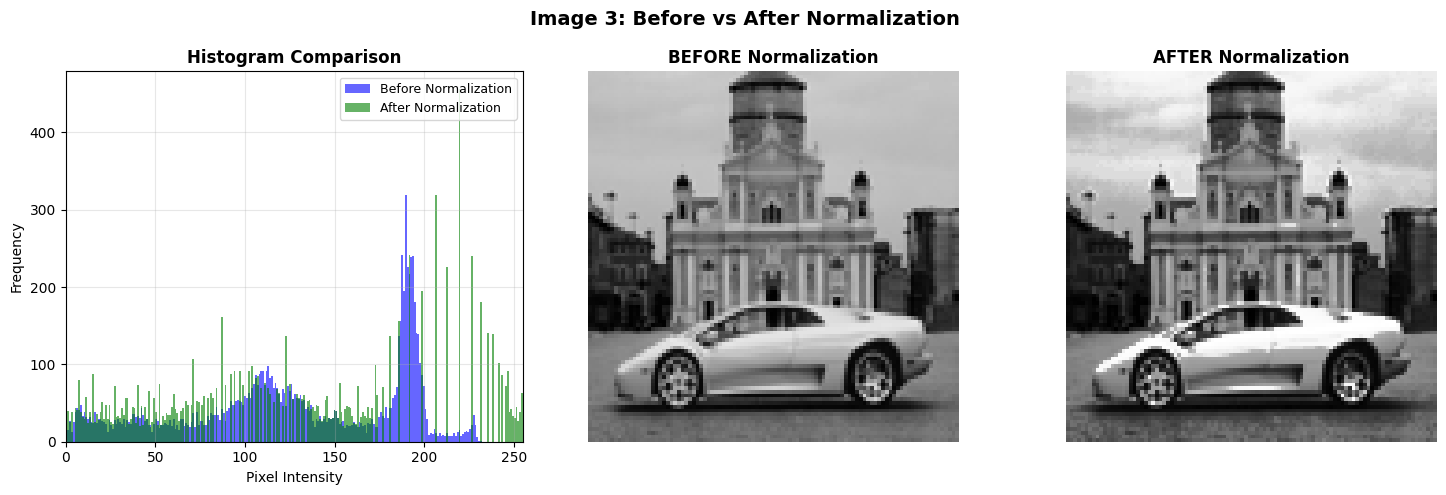

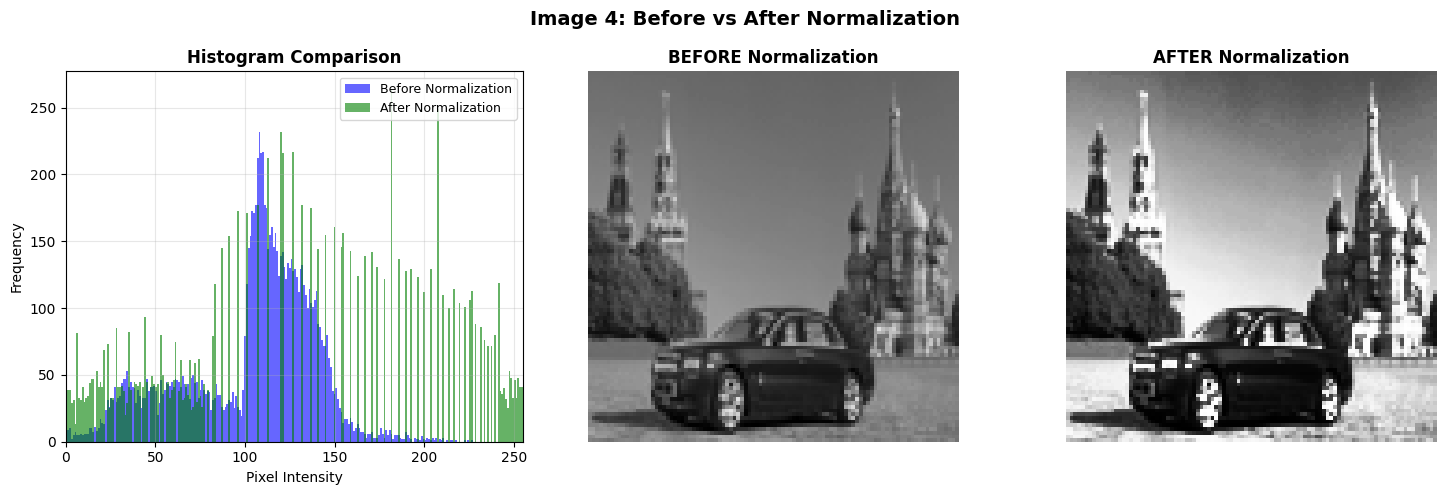

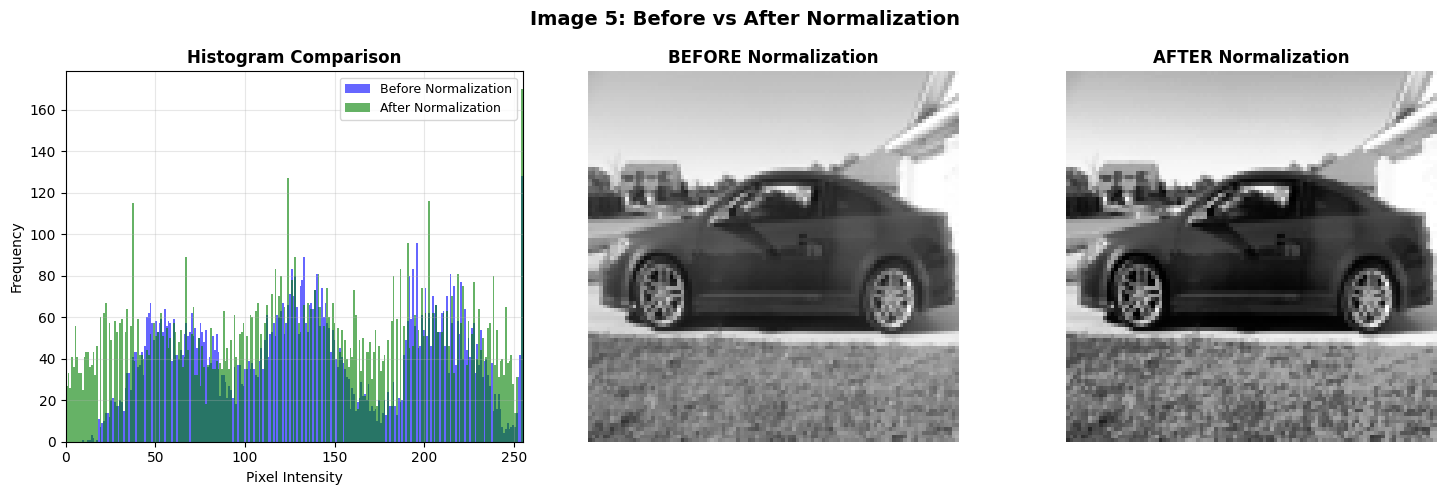

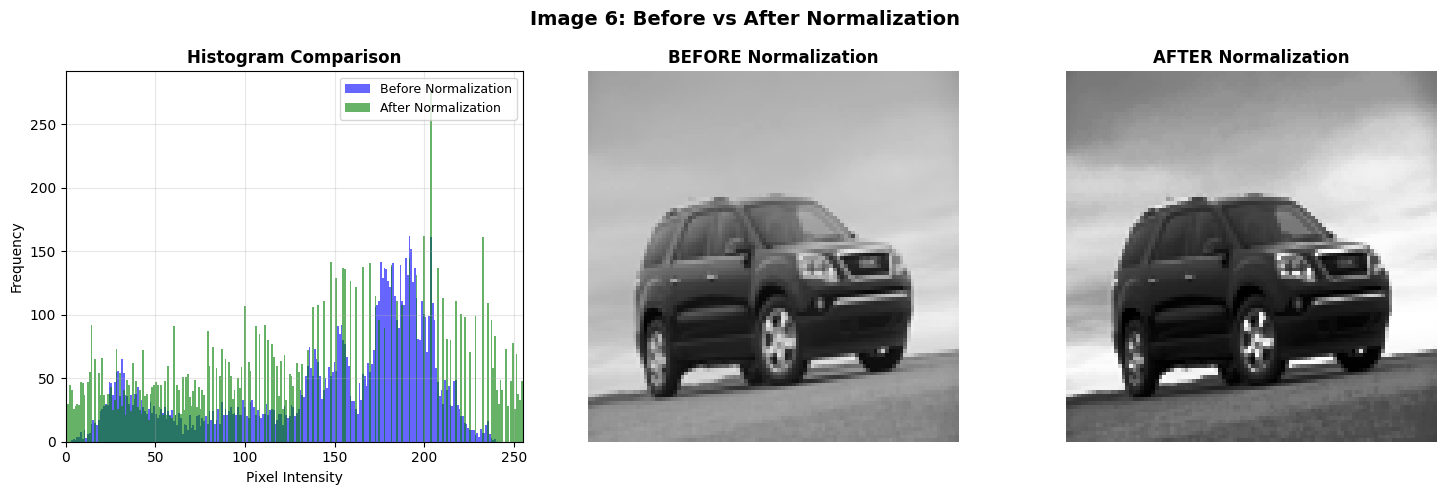

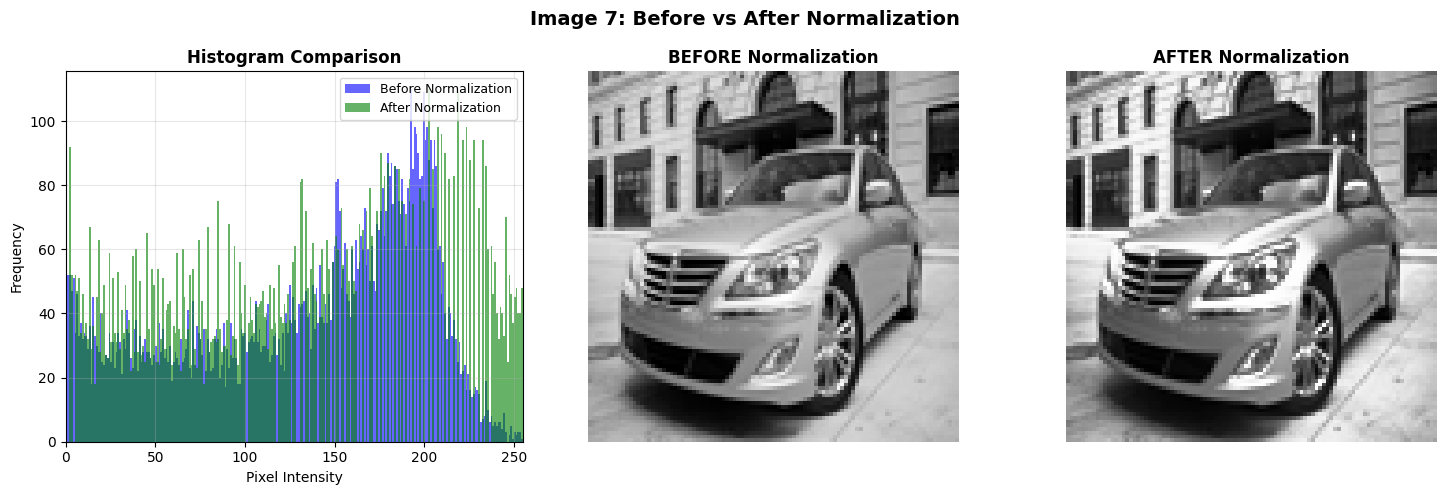

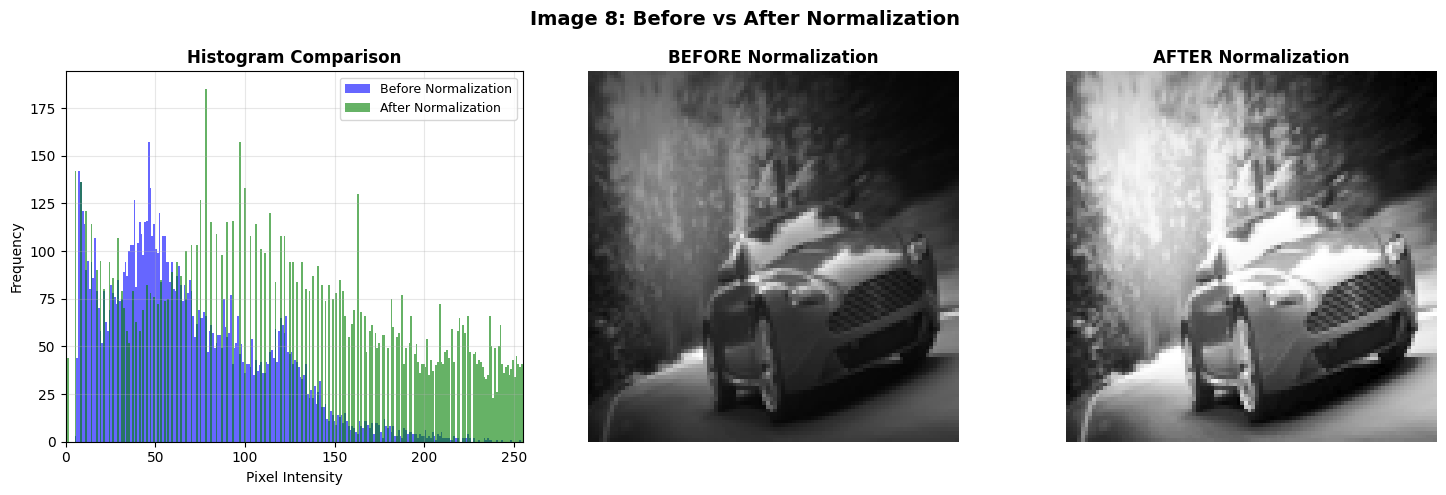

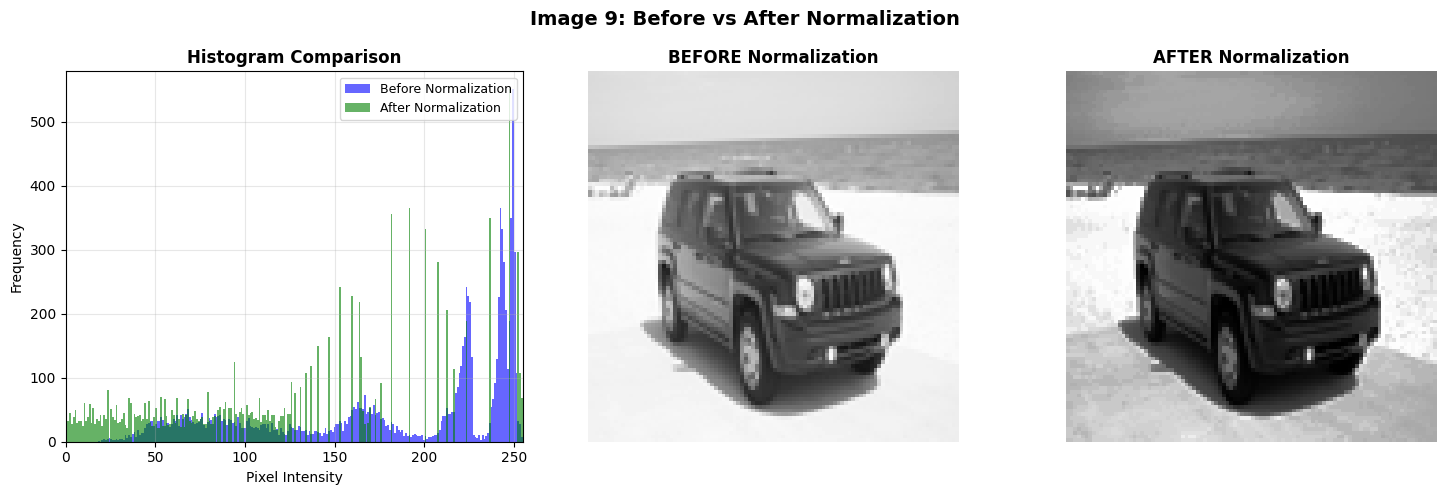

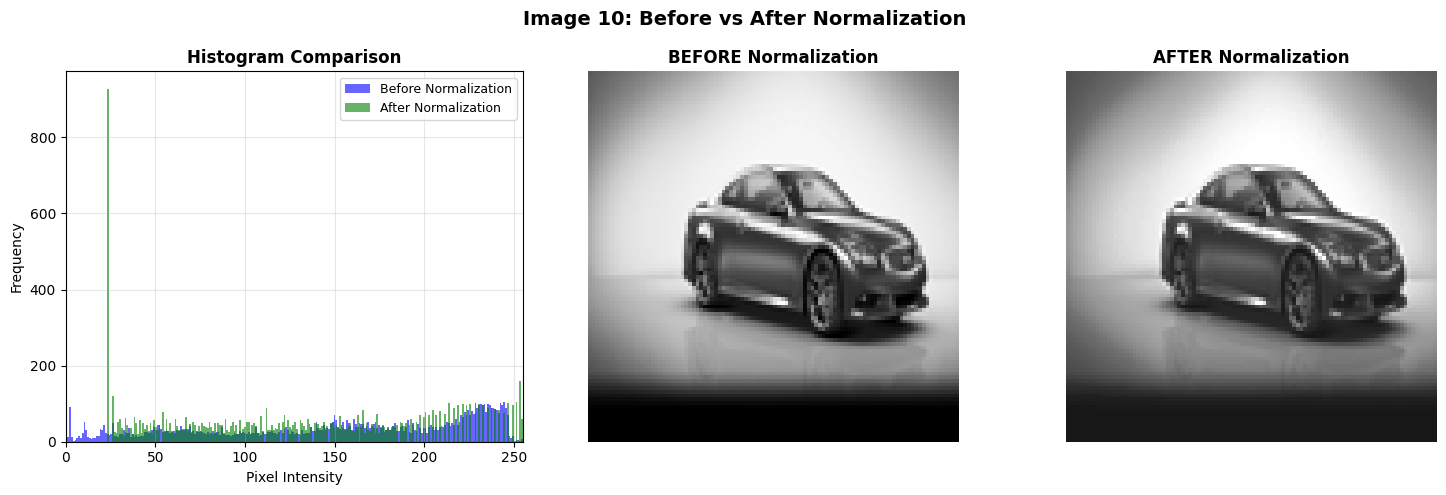

In [9]:
# Side-by-side comparison for each image
for idx in range(len(images_gray)):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Image {idx+1}: Before vs After Normalization',
                 fontsize=14, fontweight='bold')

    # Column 1: Combined histogram (Before & After normalization)
    axes[0].hist(images_flattened[idx], bins=256, range=(0, 255),
                color='blue', alpha=0.6, label='Before Normalization')
    axes[0].hist(images_normalized_flat[idx], bins=256, range=(0, 255),
                color='green', alpha=0.6, label='After Normalization')
    axes[0].set_title('Histogram Comparison', fontweight='bold', fontsize=12)
    axes[0].set_xlabel('Pixel Intensity', fontsize=10)
    axes[0].set_ylabel('Frequency', fontsize=10)
    axes[0].set_xlim([0, 255])
    axes[0].legend(loc='upper right', fontsize=9)
    axes[0].grid(True, alpha=0.3)

    # Column 2: Image BEFORE normalization
    axes[1].imshow(images_gray[idx], cmap=plt.cm.gray, vmin=0, vmax=255)
    axes[1].set_title('BEFORE Normalization', fontweight='bold', fontsize=12)
    axes[1].axis('off')

    # Column 3: Image AFTER normalization
    axes[2].imshow(images_normalized[idx], cmap=plt.cm.gray, vmin=0, vmax=255)
    axes[2].set_title('AFTER Normalization', fontweight='bold', fontsize=12)
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()


## Save Flattened Arrays to CSV File


In [10]:
# Create DataFrame with flattened arrays
column_names = [f'pixel_{i}' for i in range(10000)]
# Create DataFrame
df_images = pd.DataFrame(images_flattened, columns=column_names)
# Add image names as index
df_images.index = [f'Image_{i+1}' for i in range(len(images_flattened))]
print(f"Shape: {df_images.shape}")
print(f"Rows (images): {df_images.shape[0]}")
print(f"Columns (pixels): {df_images.shape[1]}")
# Save to CSV file
csv_filename = 'flattened_images.csv'
df_images.to_csv(csv_filename, index=True)
print(f"File size: {os.path.getsize(csv_filename) / (1024*1024):.2f} MB")

Shape: (10, 10000)
Rows (images): 10
Columns (pixels): 10000
File size: 0.45 MB


---

## Step 5: Comparing Histograms Before and After Normalization


---
**Major observations**:

When I compared the images before and after normalization, I found that the originals often suffered from "tonal clustering." Whether an image was underexposed and dark (like Image 8) or looked flat and grayish (like Image 4), the visual data was crammed into a narrow slice of the brightness range.

In my comparison, I observed three major breakthroughs across the collection:

**Expanding the Dynamic Range**: I noticed that for images that were nearly black or entirely flat, we stopped wasting the 0-255 spectrum. By stretching the pixels across the full range, I ensured that every bit of information was available for analysis.

**Better Tonal Separation**: When I looked at the original histograms, many images had "crowded" peaks where thousands of pixels shared almost the exact same shade. I found that equalization smoothed out these clusters, making it much easier to distinguish the foreground objects from the background—this is especially clear in the improved clarity of Images 1 and 3.

**Rescuing Hidden Details**: I saw that normalization acted like a rescue mission for lost data. It pulled "hidden" features out of the shadows, revealing details like the wheels in Image 2, the window reflections in Image 5, and the subtle front-end design in Image 4 that were previously invisible due to poor lighting.

------------------------------------------------


**Key Learnings**:

**Consistency (Reduced Variance)**: By standardizing the brightness, we make our model "light-blind." It learns to recognize the object itself rather than getting distracted by how sunny or dark it was when the photo was taken.

**Sharper Edge Detection**: Because we’ve boosted the contrast, the Conv2D filters in our network can "see" edges and shapes much more clearly. Better edges lead to much more accurate object recognition.

**Real-World Fairness**: Whether in hospitality or the auto industry, this ensures our quality audits are consistent. A customer shouldn't get a different "quality score" just because they took a photo in a dim garage instead of bright sunlight.

